The console stream is logged into C:\Users\jcw\sg_logs\console.log


[2024-12-07 19:03:37] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
W1207 19:03:37.601324 6568 torch\distributed\elastic\multiprocessing\redirects.py:28] NOTE: Redirects are currently not supported in Windows or MacOs.
[2024-12-07 19:03:41] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.
d:\program\anaconda\envs\nas\lib\site-packages\super_gradients\training\utils\checkpoint_utils.py:186: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to 

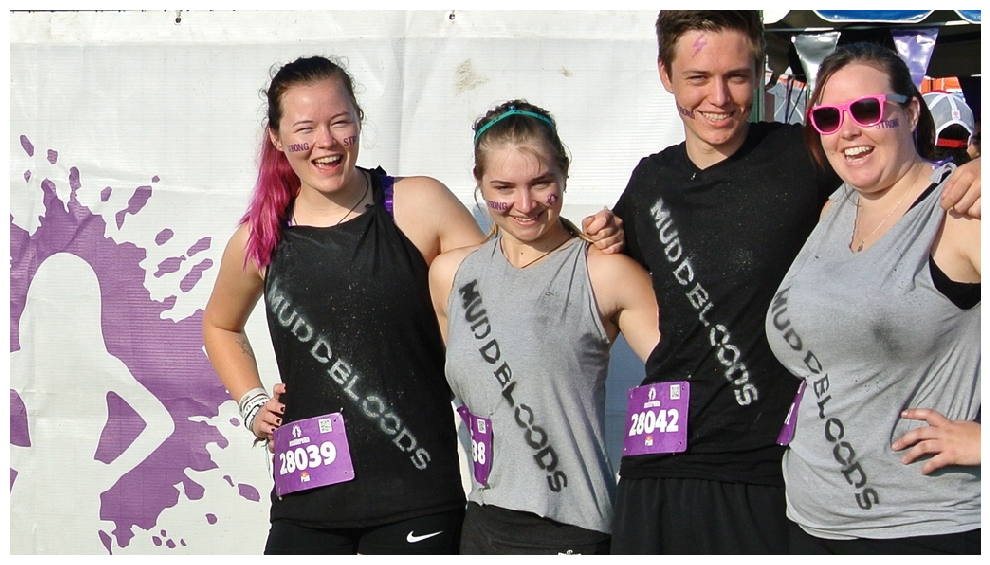

In [1]:
from super_gradients.training import models
best_model = models.get('yolo_nas_m',
                        num_classes=5,
                        checkpoint_path=r"F:\program\python\CowBoy\super-gradients\yolo_m_bs.pth") 
img_url = r'F:\program\python\CowBoy\images\0a1e99ce3aef8477.jpg'
best_model.predict(img_url).show()

In [ ]:
# best_model.predict(img_url)

In [ ]:
import cv2
import torch
import os
from super_gradients.training import models
from PIL import Image
import numpy as np

# 设置图片文件夹路径
input_dir = r'F:\program\python\CowBoy\super-gradients\train\data\images\train'
image_files = [f for f in os.listdir(input_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

# 加载模型
best_model = models.get('yolo_nas_m',
                        num_classes=5,
                        checkpoint_path=r"F:\program\python\CowBoy\super-gradients\yolo_m_bs.pth")

# 检查是否有GPU可用，并将模型迁移到GPU（如果有）
if torch.cuda.is_available():
    best_model = best_model.to("cuda")
else:
    best_model = best_model.to("cpu")

# 遍历每个图片文件进行推理
for image_file in image_files:
    # 拼接图像文件路径
    image_path = os.path.join(input_dir, image_file)

    # 加载并处理图像
    image = Image.open(image_path)
    
    # 使用predict进行推理
    predictions = best_model.predict(image)
    
    # 获取预测框、置信度、标签和类名
    bboxes = predictions.prediction.bboxes_xyxy  # 预测框
    confidences = predictions.prediction.confidence  # 置信度
    labels = predictions.prediction.labels  # 标签
    class_names = predictions.class_names  # 类名
    print(labels)
    # 将图像转换为OpenCV格式（BGR）以便绘制
    frame = np.array(image)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    # 遍历所有检测到的目标
    for i in range(len(bboxes)):
        # 获取框的坐标
        x1, y1, x2, y2 = bboxes[i]

        # 获取标签和置信度
        label = labels[i]
        confidence = confidences[i]

        # 绘制预测框
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

        # 添加标签和置信度
        label_text = f"{class_names[label]}: {confidence:.2f}"
        cv2.putText(frame, label_text, (int(x1), int(y1) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # 显示图像窗口，包含预测框
    cv2.imshow(f"Prediction for {image_file}", frame)

    # 按 'q' 键退出或按任意键查看下一张图片
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

# 关闭所有OpenCV窗口
cv2.destroyAllWindows()


[2024-12-07 19:03:53] INFO - checkpoint_utils.py - Successfully loaded model weights from F:\program\python\CowBoy\super-gradients\yolo_m_bs.pth checkpoint.
[2024-12-07 19:03:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`


[]
